# Benin Solar Data EDA
Exploratory Data Analysis for the Benin solar dataset.

In [32]:
from charset_normalizer import detect
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:



with open('../data/solar-measurements_benin-malanville_qc.csv', 'rb') as file:
    result = detect(file.read())
    print(result)

{'encoding': 'iso8859_16', 'language': 'English', 'confidence': 1.0}


In [19]:

df = pd.read_csv('../data/solar-measurements_benin-malanville_qc.csv', encoding='latin1',skiprows=[1])

In [22]:
print(df.head())
print("\nColumns:", df.columns.tolist())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

Columns: ['Timestam

In [21]:

print("Data Types:\n", df.dtypes)
print("\nSample Data:\n", df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']].head())

Data Types:
 Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

Sample Data:
    GHI  DNI  DHI  ModA  ModB   WS  WSgust
0 -1.2 -0.2 -1.1   0.0   0.0  0.0     0.4
1 -1.1 -0.2 -1.1   0.0   0.0  0.0     0.0
2 -1.1 -0.2 -1.1   0.0   0.0  0.3     1.1
3 -1.1 -0.1 -1.0   0.0   0.0  0.2     0.7
4 -1.0 -0.1 -1.0   0.0   0.0  0.1     0.7


In [23]:

summary_stats = df.describe()
print(summary_stats)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [24]:
# Missing values
missing_values = df.isna().sum()
missing_percent = (missing_values / len(df)) * 100
print("Missing Values:\n", missing_values)
print("\nColumns with >5% missing values:\n", missing_percent[missing_percent > 5])

Missing Values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% missing values:
 Comments    100.0
dtype: float64


In [25]:
# Drop columns with >50% missing values
df = df.loc[:, df.isna().mean() < 0.5]

In [26]:
key_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
for col in key_columns:
    non_numeric = df[col][pd.to_numeric(df[col], errors='coerce').isna() & df[col].notna()]
    if not non_numeric.empty:
        print(f"Non-numeric values in {col}:\n", non_numeric.unique())

In [27]:

z_scores = df[key_columns].apply(zscore, nan_policy='omit')
# Flag outliers (|Z| > 3)
outliers = (z_scores.abs() > 3).any(axis=1)
print(f"Number of rows with outliers: {outliers.sum()}")

Number of rows with outliers: 7740


In [28]:
print("Sample outlier rows:\n", df[outliers][key_columns].head())

Sample outlier rows:
         GHI    DNI    DHI    ModA    ModB   WS  WSgust
670   836.0  235.0  610.6   778.8   783.8  3.2     4.1
671  1274.0  698.8  615.2  1210.3  1210.3  3.4     4.1
672   938.0  340.1  612.8   891.1   891.1  3.4     4.6
673   718.5  126.8  593.2   682.6   682.6  4.7     5.6
674  1349.0  771.8  618.0  1281.5  1281.5  4.0     4.6


In [29]:
# Export cleaned data
df.to_csv('../data/benin_clean.csv', index=False)

In [30]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\naomi.DESKTOP-T924HPN\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


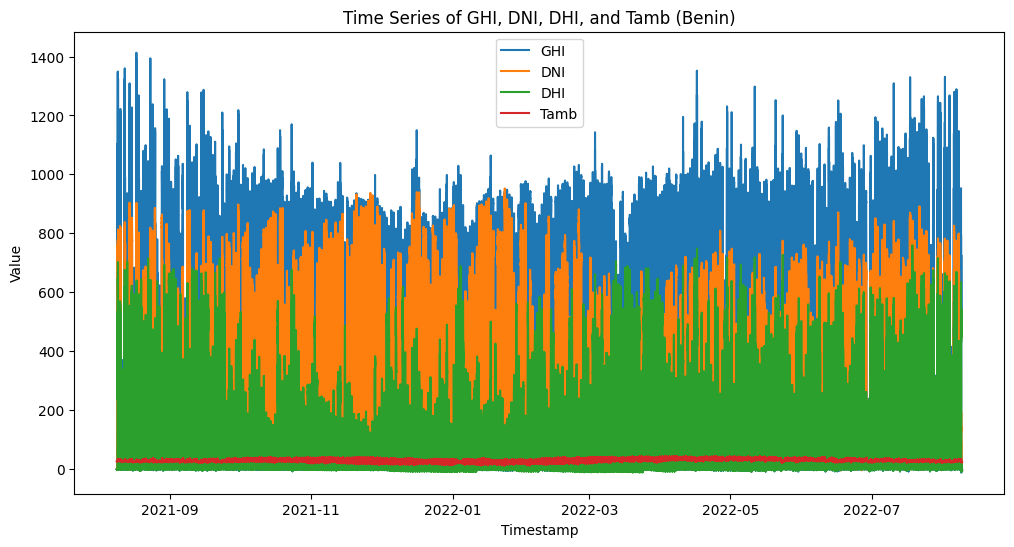

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Time Series of GHI, DNI, DHI, and Tamb (Benin)')
plt.legend()
plt.show()

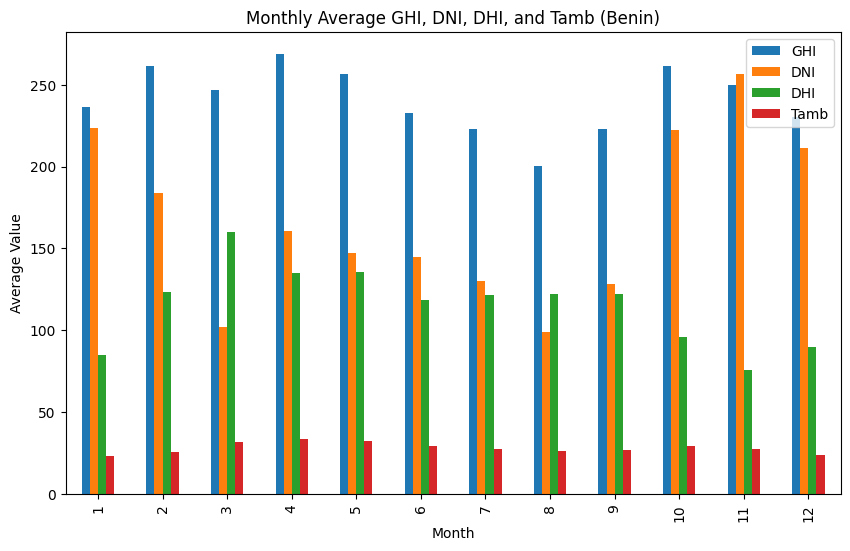

In [34]:
df['Month'] = df['Timestamp'].dt.month
monthly_stats = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()

# Create bar chart for monthly averages
monthly_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Average GHI, DNI, DHI, and Tamb (Benin)')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.show()

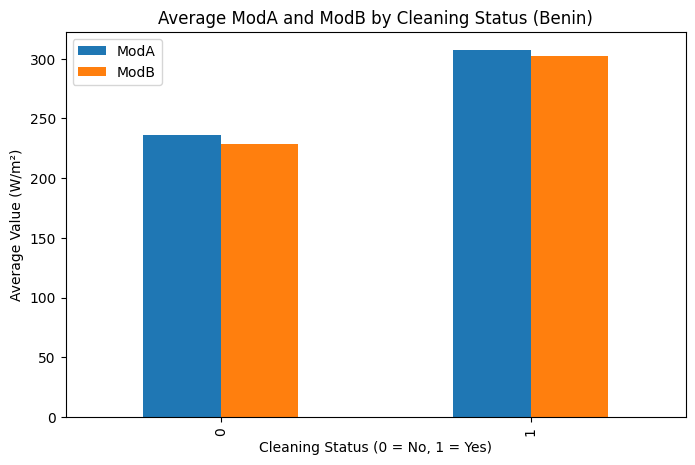

In [35]:
# Group by Cleaning flag and calculate average ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plot bar chart
cleaning_impact.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB by Cleaning Status (Benin)')
plt.xlabel('Cleaning Status (0 = No, 1 = Yes)')
plt.ylabel('Average Value (W/m²)')
plt.show()